In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [208]:
df = pd.read_csv("./datasets/banking.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

<Axes: >

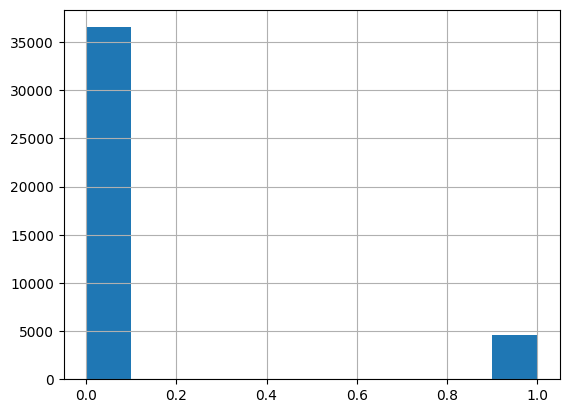

In [209]:
df['y'].hist()

In [210]:
# Check for null values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

/tmp/ipykernel_1125/3593514696.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


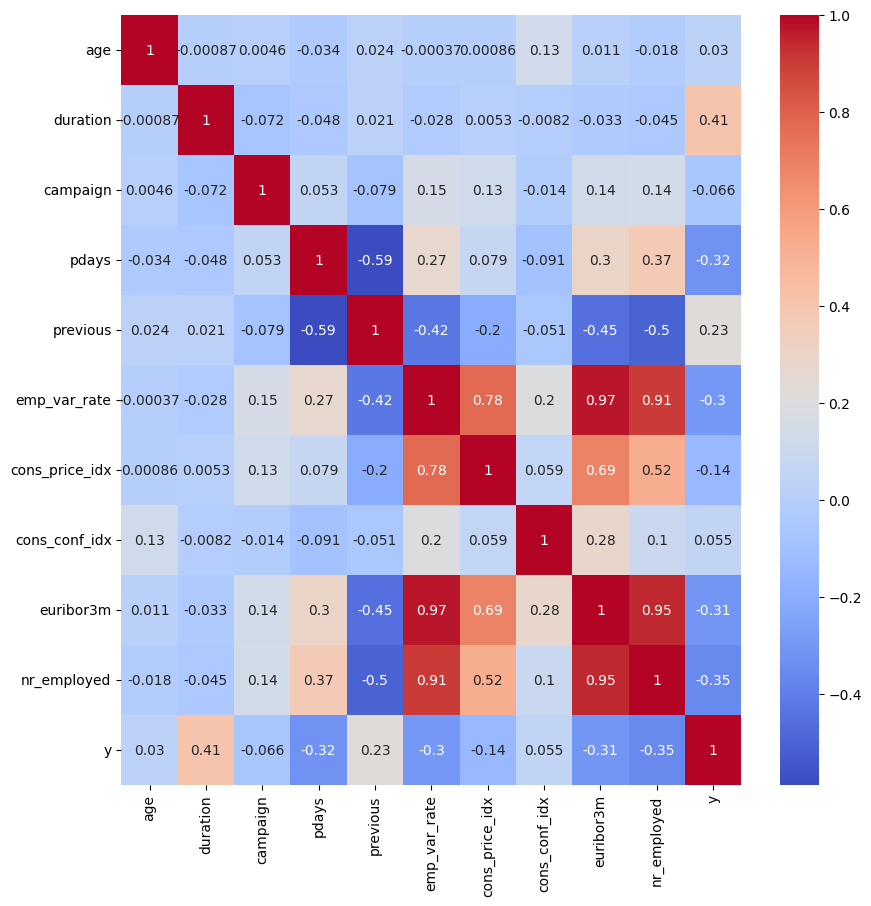

In [211]:
corr = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


In [212]:
# Drop euribor3m column and nr_employed column

df.drop(['euribor3m', 'nr_employed'], axis=1, inplace=True)

In [213]:
df = pd.read_csv("./datasets/banking.csv")

/tmp/ipykernel_1125/3593514696.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


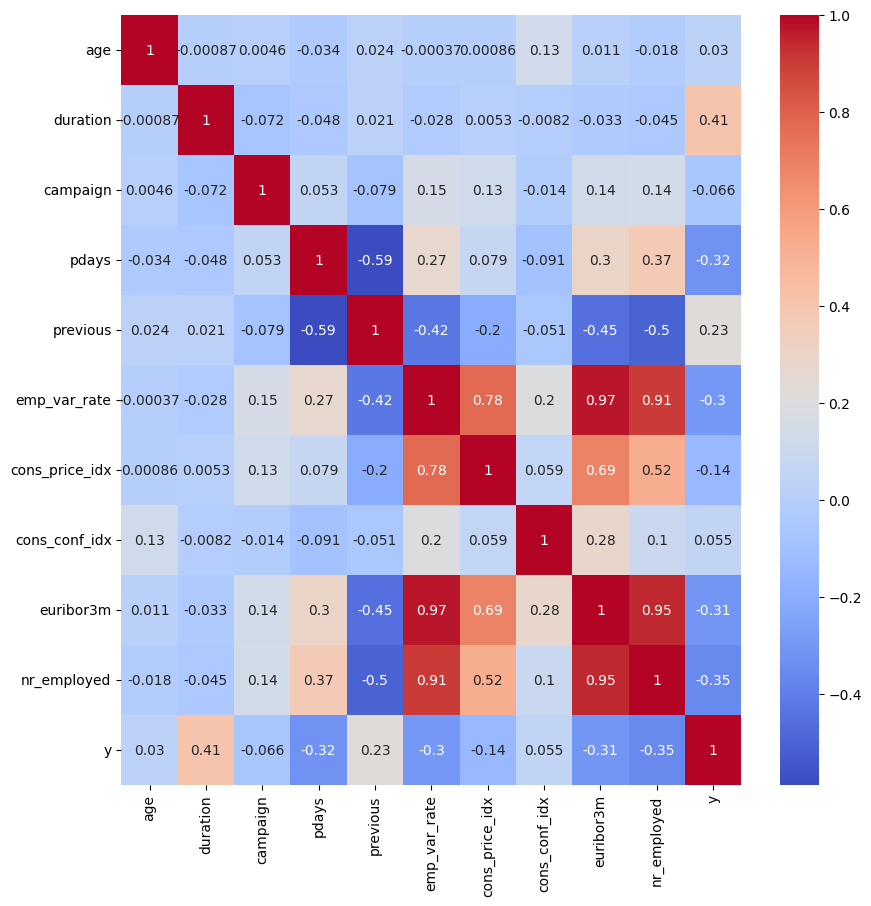

In [214]:
corr = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


In [215]:
# Remove Outliers, For Each float type value, find the first and third quantile, and remove the values that are outside of 1.5 times of the interquantile range
for col in df.select_dtypes(include=['float64']).columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = round(q3 - q1, 3)
    print(f"{col} => , q1 : {q1}, q3 : {q3}, iqr : {iqr}")
    # print the number of outliers removed
    before = df.shape[0]
    df = df[(df[col] >= q1 - 1.5 * iqr) & (df[col] <= q3 + 1.5 * iqr)]
    print(f"Outliers removed : {before - df.shape[0]}")

emp_var_rate => , q1 : -1.8, q3 : 1.4, iqr : 3.2
Outliers removed : 0
cons_price_idx => , q1 : 93.075, q3 : 93.994, iqr : 0.919
Outliers removed : 0
cons_conf_idx => , q1 : -42.7, q3 : -36.4, iqr : 6.3
Outliers removed : 447
euribor3m => , q1 : 1.354, q3 : 4.961, iqr : 3.607
Outliers removed : 0
nr_employed => , q1 : 5099.1, q3 : 5228.1, iqr : 129.0
Outliers removed : 0


In [216]:
# Standardize the float data type cols and print which cols are standardized and their mean and std before and after standardization

for col in df.select_dtypes(include=['float64']).columns:
    print(f"{col} => mean : {df[col].mean()}, std : {df[col].std()}")
    scaler = StandardScaler()
    df[col] = scaler.fit_transform(df[[col]])
    print(f"{col} => mean : {df[col].mean()}, std : {df[col].std()}")
    

In [217]:
# Print every categorical column and their unique values
count = 0
for indx, col in enumerate(df.select_dtypes(include=['object']).columns):
    print(f"{col} => {df[col].unique()}")
    count += 1

print(f"Total categorical columns : {count}")

job => ['blue-collar' 'technician' 'management' 'services' 'retired' 'admin.'
 'housemaid' 'unemployed' 'entrepreneur' 'self-employed' 'unknown'
 'student']
marital => ['married' 'single' 'divorced' 'unknown']
education => ['basic.4y' 'unknown' 'university.degree' 'high.school' 'basic.9y'
 'professional.course' 'basic.6y' 'illiterate']
default => ['unknown' 'no' 'yes']
housing => ['yes' 'no' 'unknown']
loan => ['no' 'yes' 'unknown']
contact => ['cellular' 'telephone']
month => ['aug' 'nov' 'jun' 'apr' 'jul' 'may' 'oct' 'mar' 'sep' 'dec']
day_of_week => ['thu' 'fri' 'tue' 'mon' 'wed']
poutcome => ['nonexistent' 'success' 'failure']
Total categorical columns : 10


In [218]:
# # Convert the categorical variables to numerical variables
# # Convert the job column to one hot encoding
# df = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'])

# df['job'] = df['job'].map({'admin.': 0, 'blue-collar': 1, 'technician': 2, 'services': 3, 'management': 4, 'retired': 5, 'entrepreneur': 6, 'self-employed': 7, 'housemaid': 8, 'unemployed': 9, 'student': 10, 'unknown': 11})
# df['marital'] = df['marital'].map({'single': 0, 'married': 1, 'divorced': 2, 'unknown': 3})
# df['education'] = df['education'].map({'university.degree': 0, 'high.school': 1, 'basic.9y': 2, 'professional.course': 3, 'basic.4y': 4, 'basic.6y': 5, 'illiterate': 6, 'unknown': 7})
# df['default'] = df['default'].map({'no': -1, 'yes': 1, 'unknown': 0})
# df['housing'] = df['housing'].map({'no': -1, 'yes': 1, 'unknown': 0})
# df['loan'] = df['loan'].map({'no': 0, 'yes': 1, 'unknown': 0})
# df['contact'] = df['contact'].map({'cellular': 0, 'telephone': 1})
# df['month'] = df['month'].map({'may': 0, 'jul': 1, 'aug': 2, 'jun': 3, 'nov': 4, 'apr': 5, 'oct': 6, 'sep': 7, 'mar': 8, 'dec': 9})
# df['day_of_week'] = df['day_of_week'].map({'thu': 0, 'mon': 1, 'wed': 2, 'tue': 3, 'fri': 4})
# df['poutcome'] = df['poutcome'].map({'nonexistent': 0, 'failure': -1, 'success': 1})


df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40741 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             40741 non-null  int64  
 1   job             40741 non-null  object 
 2   marital         40741 non-null  object 
 3   education       40741 non-null  object 
 4   default         40741 non-null  object 
 5   housing         40741 non-null  object 
 6   loan            40741 non-null  object 
 7   contact         40741 non-null  object 
 8   month           40741 non-null  object 
 9   day_of_week     40741 non-null  object 
 10  duration        40741 non-null  int64  
 11  campaign        40741 non-null  int64  
 12  pdays           40741 non-null  int64  
 13  previous        40741 non-null  int64  
 14  poutcome        40741 non-null  object 
 15  emp_var_rate    40741 non-null  float64
 16  cons_price_idx  40741 non-null  float64
 17  cons_conf_idx   40741 non-null 

In [219]:
# OneHot Encode categorical data and drop the first column of each categorical data
df = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'], drop_first=True)


In [220]:
df

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,0,1,0,0,1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,1,0,0,0,0,0,0,1,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,0,0,1,0,0,0,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,0,0,0,0,0,0,1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41182,24,118,4,999,1,-1.8,92.893,-46.2,1.266,5099.1,...,1,0,0,0,0,1,0,0,0,0
41183,59,222,1,999,0,1.4,94.465,-41.8,4.866,5228.1,...,0,0,0,0,0,1,0,0,1,0
41184,31,196,2,999,0,1.1,93.994,-36.4,4.860,5191.0,...,1,0,0,0,0,1,0,0,1,0
41185,42,62,3,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,0,0,1,1,0


In [221]:
# Scale all columns float type columns to range 0 and 1 
from sklearn.preprocessing import MinMaxScaler
for col in df.select_dtypes(include=['float64']).columns:
    scaler = MinMaxScaler()
    df[col] = scaler.fit_transform(df[[col]])

df


,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,1.000000,0.484412,0.700000,0.981410,1.000000,...,0,0,0,0,0,1,0,0,1,0
1,53,138,1,999,0,0.687500,0.389322,0.419048,0.767853,0.877883,...,0,1,0,0,0,0,0,0,1,0
2,28,339,3,6,2,0.354167,0.722525,0.523810,0.021537,0.105860,...,0,0,0,0,0,1,0,0,0,1
3,39,185,2,999,0,0.333333,0.340608,0.176190,0.174790,0.512287,...,0,0,0,0,0,0,0,0,1,0
4,55,137,1,3,1,0.104167,0.000000,0.923810,0.053276,0.425709,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41182,24,118,4,999,1,0.333333,0.269680,0.219048,0.143278,0.512287,...,1,0,0,0,0,1,0,0,0,0
41183,59,222,1,999,0,1.000000,0.882307,0.428571,0.959420,1.000000,...,0,0,0,0,0,1,0,0,1,0
41184,31,196,2,999,0,0.937500,0.698753,0.685714,0.958059,0.859735,...,1,0,0,0,0,1,0,0,1,0
41185,42,62,3,999,0,0.937500,0.698753,0.685714,0.957379,0.859735,...,1,0,0,0,0,0,0,1,1,0


In [223]:
# Select 10 best features for dataset using SelectKBest

from sklearn.feature_selection import SelectKBest, chi2

X = df.drop('y', axis=1)
y = df['y']

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']
print(featureScores.nlargest(10, 'Score'))


                Specs         Score
1            duration  1.792457e+06
3               pdays  1.489313e+05
52   poutcome_success  3.915181e+03
4            previous  3.026637e+03
42          month_mar  8.783782e+02
8           euribor3m  8.168469e+02
46          month_sep  6.745115e+02
37  contact_telephone  5.164539e+02
2            campaign  4.962696e+02
5        emp_var_rate  4.751453e+02


In [224]:
best_cols = featureScores.nlargest(20, 'Score')['Specs'].values

In [225]:
# Delete the columns that are not in the best_cols
for col in df.columns:
    if col not in best_cols and col != 'y':
        df.drop(col, axis=1, inplace=True)

df

,duration,campaign,pdays,previous,emp_var_rate,euribor3m,nr_employed,y,job_blue-collar,job_retired,...,marital_single,default_unknown,contact_telephone,month_dec,month_mar,month_may,month_oct,month_sep,poutcome_nonexistent,poutcome_success
0,210,1,999,0,1.000000,0.981410,1.000000,0,1,0,...,0,1,0,0,0,0,0,0,1,0
1,138,1,999,0,0.687500,0.767853,0.877883,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,339,3,6,2,0.354167,0.021537,0.105860,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,185,2,999,0,0.333333,0.174790,0.512287,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,137,1,3,1,0.104167,0.053276,0.425709,1,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41182,118,4,999,1,0.333333,0.143278,0.512287,0,0,0,...,0,0,0,0,0,1,0,0,0,0
41183,222,1,999,0,1.000000,0.959420,1.000000,0,0,1,...,0,1,1,0,0,0,0,0,1,0
41184,196,2,999,0,0.937500,0.958059,0.859735,0,0,0,...,0,1,1,0,0,1,0,0,1,0
41185,62,3,999,0,0.937500,0.957379,0.859735,0,0,0,...,1,1,1,0,0,1,0,0,1,0


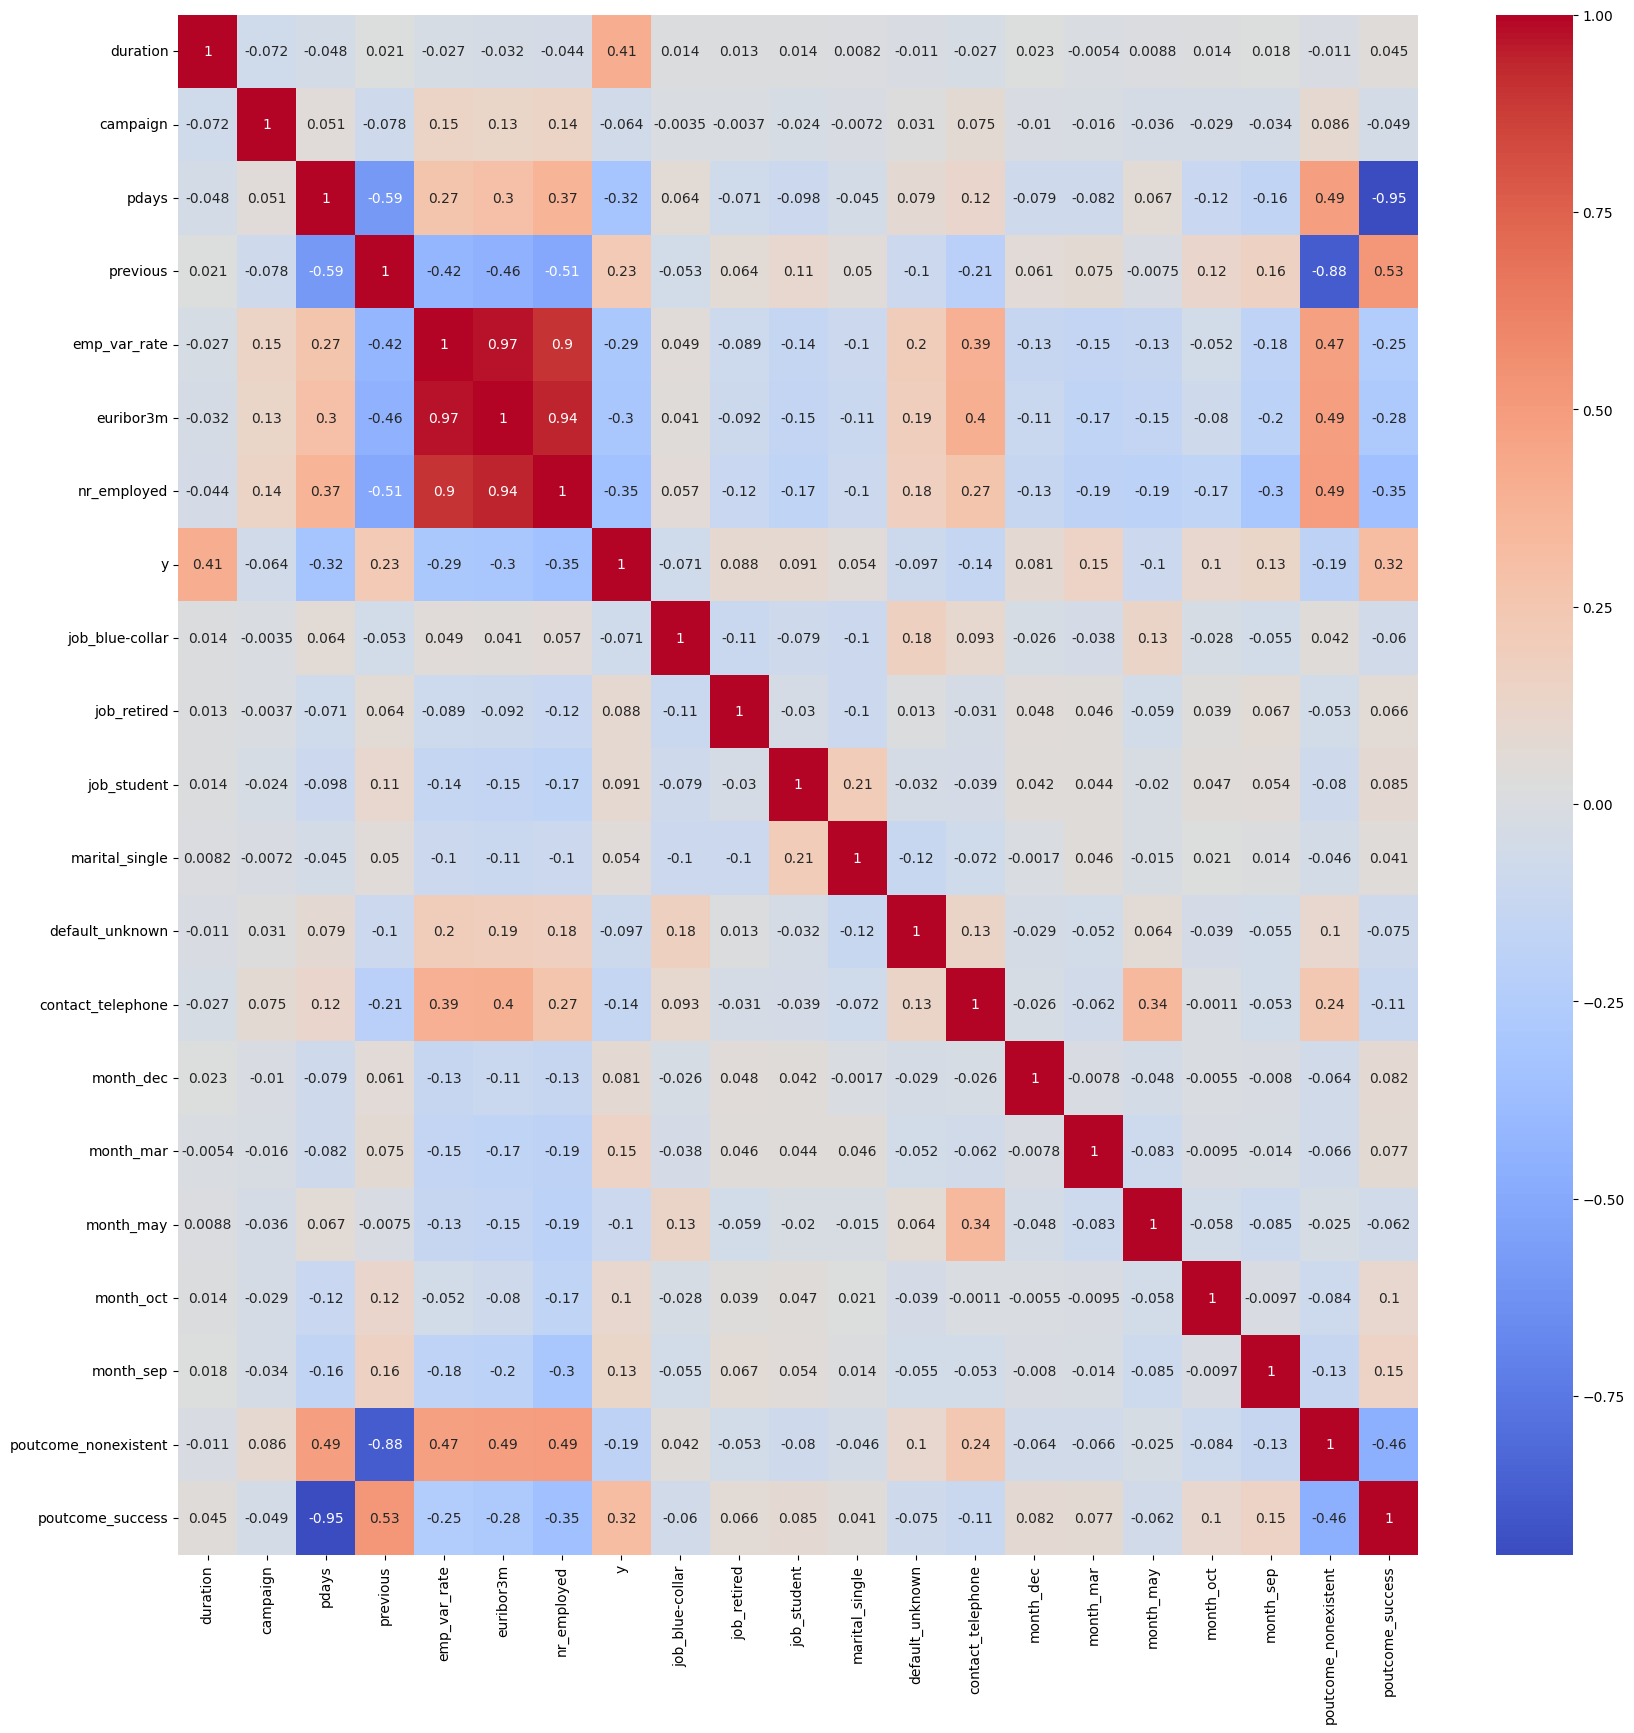

In [226]:
corr = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [227]:
# Train Test Split
X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)


In [ ]:
# # Find the t-SNE for samples as row with all columns except y column and use y as color in plot using seaborn
# from sklearn.manifold import TSNE
# tsne = TSNE(n_components=2, random_state=101)
# tsne_data = tsne.fit_transform(X_train)

# tsne_df = pd.DataFrame(tsne_data, columns=['tsne1', 'tsne2'])
# tsne_df['y'] = y_train.values

# plt.figure(figsize=(10, 10))
# sns.scatterplot(x='tsne1', y='tsne2', hue='y', data=tsne_df)
# plt.show()




In [228]:
# Write a Cross Validation function to find the best hyperparameters for the SVM model searching for different kernels
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'kernel': ['rbf', 'poly', 'linear']}
scoring = ['f1_macro', 'accuracy','f1_micro']
grid = GridSearchCV(SVC(), param_grid, refit='f1_micro', verbose=3, cv=4, scoring=scoring)
grid.fit(X_train, y_train)
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

Fitting 4 folds for each of 3 candidates, totalling 12 fits
[CV 1/4] END kernel=rbf; accuracy: (test=0.902) f1_macro: (test=0.674) f1_micro: (test=0.902) total time=  24.2s
[CV 2/4] END kernel=rbf; accuracy: (test=0.903) f1_macro: (test=0.671) f1_micro: (test=0.903) total time=  25.3s
[CV 3/4] END kernel=rbf; accuracy: (test=0.905) f1_macro: (test=0.676) f1_micro: (test=0.905) total time=  20.8s
[CV 4/4] END kernel=rbf; accuracy: (test=0.906) f1_macro: (test=0.671) f1_micro: (test=0.906) total time=  21.0s
[CV 1/4] END kernel=poly; accuracy: (test=0.901) f1_macro: (test=0.635) f1_micro: (test=0.901) total time=  30.8s
[CV 2/4] END kernel=poly; accuracy: (test=0.900) f1_macro: (test=0.628) f1_micro: (test=0.900) total time=  19.9s
[CV 3/4] END kernel=poly; accuracy: (test=0.901) f1_macro: (test=0.636) f1_micro: (test=0.901) total time=  17.4s
[CV 4/4] END kernel=poly; accuracy: (test=0.901) f1_macro: (test=0.634) f1_micro: (test=0.901) total time=  21.6s
[CV 1/4] END kernel=linear; accu

In [ ]:
grid.cv_results_

{'mean_fit_time': array([ 20.44359046,  22.18181092, 414.53143388]),
 'std_fit_time': array([ 0.49095255,  1.52067299, 47.85975345]),
 'mean_score_time': array([4.59348816, 2.1306929 , 1.02914888]),
 'std_score_time': array([1.13997412, 0.03306418, 0.10551946]),
 'param_kernel': masked_array(data=['rbf', 'poly', 'linear'],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'kernel': 'rbf'}, {'kernel': 'poly'}, {'kernel': 'linear'}],
 'split0_test_f1_macro': array([0.67270599, 0.63657128, 0.7102816 ]),
 'split1_test_f1_macro': array([0.67119887, 0.63217891, 0.71038773]),
 'split2_test_f1_macro': array([0.67676397, 0.63511182, 0.67738213]),
 'split3_test_f1_macro': array([0.67199426, 0.63489012, 0.66177518]),
 'mean_test_f1_macro': array([0.67316577, 0.63468803, 0.68995666]),
 'std_test_f1_macro': array([0.00214474, 0.00158609, 0.02111188]),
 'rank_test_f1_macro': array([2, 3, 1], dtype=int32),
 'split0_test_accuracy': array([0.9019

In [ ]:
# Train a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7257
           1       0.67      0.46      0.54       892

    accuracy                           0.92      8149
   macro avg       0.80      0.71      0.75      8149
weighted avg       0.91      0.92      0.91      8149



In [ ]:
rfc

RandomForestClassifier()

In [ ]:
# Train a perceptron model with one hidden layer and 10 neurons with tanh activation function
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(20,), activation='tanh', max_iter=1000)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7257
           1       0.66      0.46      0.54       892

    accuracy                           0.92      8149
   macro avg       0.80      0.71      0.75      8149
weighted avg       0.91      0.92      0.91      8149



In [ ]:
# Implenet and test dummy classifier with uniform strategy
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='uniform')

dummy.fit(X_train, y_train)
y_pred = dummy.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.49      0.64      7257
           1       0.11      0.51      0.18       892

    accuracy                           0.50      8149
   macro avg       0.50      0.50      0.41      8149
weighted avg       0.80      0.50      0.59      8149



In [ ]:
# Implement a voting classifier with the best 3 models
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[('svc', svc), ('rfc', rfc), ('mlp', mlp)], voting='hard')
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)

print(classification_report(y_test, y_pred))

NameError: name 'svc' is not defined

In [ ]:
# Implement a bagging classifier with the best 3 models
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(base_estimator=svc, n_estimators=10, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print(classification_report(y_test, y_pred))


/home/vavre/data-mining/venv/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7257
           1       0.68      0.29      0.41       892

    accuracy                           0.91      8149
   macro avg       0.80      0.64      0.68      8149
weighted avg       0.89      0.91      0.89      8149



In [ ]:
bag_clf.base_estimator_

/home/vavre/data-mining/venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `base_estimator_` was deprecated in version 1.2 and will be removed in 1.4. Use `estimator_` instead.
  warnings.warn(msg, category=FutureWarning)


SVC()

In [ ]:
# Implement a boosting classifier with the best 3 models
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(base_estimator=svc, n_estimators=10, algorithm='SAMME', learning_rate=0.5)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)

print(classification_report(y_test, y_pred))


/home/vavre/data-mining/venv/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7257
           1       0.00      0.00      0.00       892

    accuracy                           0.89      8149
   macro avg       0.45      0.50      0.47      8149
weighted avg       0.79      0.89      0.84      8149



/home/vavre/data-mining/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vavre/data-mining/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vavre/data-mining/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Train an XGBoost Classifier
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      7257
           1       0.66      0.55      0.60       892

    accuracy                           0.92      8149
   macro avg       0.80      0.76      0.78      8149
weighted avg       0.91      0.92      0.92      8149



In [ ]:
# Discretize float columns
disc_df = df.copy()
for col in df.select_dtypes(include=['float64']).columns:
    disc_df[col] = pd.cut(df[col], bins=10, labels=False)

disc_df["duration"] = pd.cut(df["duration"], bins=10, labels=False)
disc_df["age"] = pd.cut(df["age"], bins=10, labels=False)


In [ ]:
# Show the unique values count for all the columns
for col in disc_df.columns:
    print(f"{col} => {len(disc_df[col].unique())}")


age => 10
job => 12
marital => 4
education => 8
default => 3
housing => 3
loan => 2
contact => 2
month => 10
day_of_week => 5
duration => 10
campaign => 42
pdays => 27
previous => 8
poutcome => 3
emp_var_rate => 6
cons_price_idx => 9
cons_conf_idx => 10
euribor3m => 8
nr_employed => 7
y => 2


In [ ]:
# Train Test Split
X_disc = disc_df.drop('y', axis=1)
y_disc = disc_df['y']

X_disc_train, X_disc_test, y_disc_train, y_disc_test = train_test_split(X_disc, y_disc, test_size=0.2, random_state=101, stratify=y)


In [ ]:
# Do the classification using Assosiation Rule Mining using pyarc 
from pyarc import CBA, TransactionDB

cba = CBA(support=0.20, confidence=0.5, algorithm="m1")
X_train_df = pd.DataFrame(X_disc_train,y_disc_train)
X_test_df = pd.DataFrame(X_disc_test,y_disc)
X_train_cba = TransactionDB.from_DataFrame(X_train_df)
cba.fit(X_train_cba)


In [ ]:
X_test_df = pd.DataFrame(X_test,y)
X_test_cba = TransactionDB.from_DataFrame(X_test_df)
cba.rule_model_accuracy(X_test_cba) 


0.0

In [ ]:
from pyarc.qcba.data_structures import (
    IntervalReader,
    Interval,
    QuantitativeDataFrame,
    QuantitativeCAR
)
from pyarc.qcba.data_structures import QuantitativeDataFrame
from pyarc.qcba import QCBA

